In [1]:
# Imports
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import sys
import matplotlib.pyplot as plt
from master_data_functions.functions import *
from analysis_functions.functions import *
from master_models.pretrained import pretrained_model
%load_ext autoreload
%autoreload 2


In [9]:

# File import
# Sample filenames are:
# CeBr10kSingle_1.txt -> single events, 
# CeBr10kSingle_2.txt -> single events
# CeBr10k_1.txt -> mixed single and double events 
# CeBr10.txt -> small file of 10 samples
# CeBr2Mil_Mix.txt -> 2 million mixed samples of simulated events

DATA_PATH = "../../data/sample/"
OUTPUT_PATH = "../../data/output/"
MODEL_PATH = OUTPUT_PATH + "models/"

# ================== Import Data ==================
#images = np.load(DATA_PATH + "images_1M.npy")
#positions = np.load(DATA_PATH + "positions_1M.npy")
#energies = np.load(DATA_PATH + "energies_1M.npy")
#labels = np.load(DATA_PATH + "labels_1M.npy")
#images = np.load(DATA_PATH + "images_noscale_200k.npy")
#energies = np.load(DATA_PATH + "energies_noscale_200k.npy")
#positions = np.load(DATA_PATH + "positions_noscale_200k.npy")
#labels = np.load(DATA_PATH + "labels_noscale_200k.npy")

data = import_data("../../data/sample/" + "CeBr10.txt")
images = data['images']
positions = data['positions']
energies = data['energies']
labels = data['labels']

with open("../../data/sample/" + "CeBr10.txt") as fp:
    check = fp.readlines()


#images = normalize_image_data(images)

n_classes = len(np.unique(labels))

print("Number of classes: {}".format(n_classes))
print("Images shape: {}".format(images.shape))
print("Energies shape: {}".format(energies.shape))
print("Positions shape: {}".format(positions.shape))
print("Labels shape: {}".format(labels.shape))


Number of classes: 1
Images shape: (10, 16, 16, 1)
Energies shape: (10, 2)
Positions shape: (10, 4)
Labels shape: (10, 1)


(16, 16)
[   5.13775    9.28606 -100.      -100.     ]


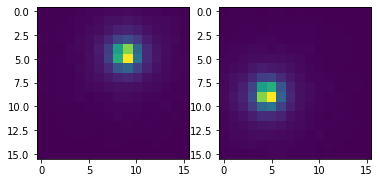

In [25]:
check0 = np.fromstring(check[0], sep=' ')
check0 = check0[:256].reshape((16,16))
print(check0.shape)
fig, ax = plt.subplots(1,2)
ax[0].imshow(check0)
ax[1].imshow(images[0].reshape((16,16)))
print(positions[0])

# Correlation analysis

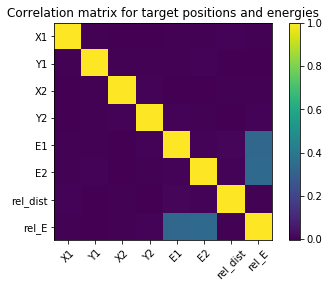

In [23]:
# ================== Prepare Data ==================
#images = images.reshape(images.shape[0], 256)
single, double, close = event_indices(positions)
rel_dist = relative_distance(positions)
rel_e = relative_energy(energies)
data = np.concatenate((positions, energies, rel_dist, rel_e), axis=1)


indices = np.random.choice(double, 10000, replace=False)

ticks = ["X1", "Y1", "X2", "Y2", "E1", "E2", "rel_dist", "rel_E"]
corr_matrix = np.corrcoef(data[double], rowvar=False)
plt.imshow(corr_matrix)
plt.xticks(np.arange(len(ticks)), ticks, rotation=45)
plt.yticks(np.arange(len(ticks)), ticks)
plt.colorbar()
plt.title("Correlation matrix for target positions and energies")
plt.show()

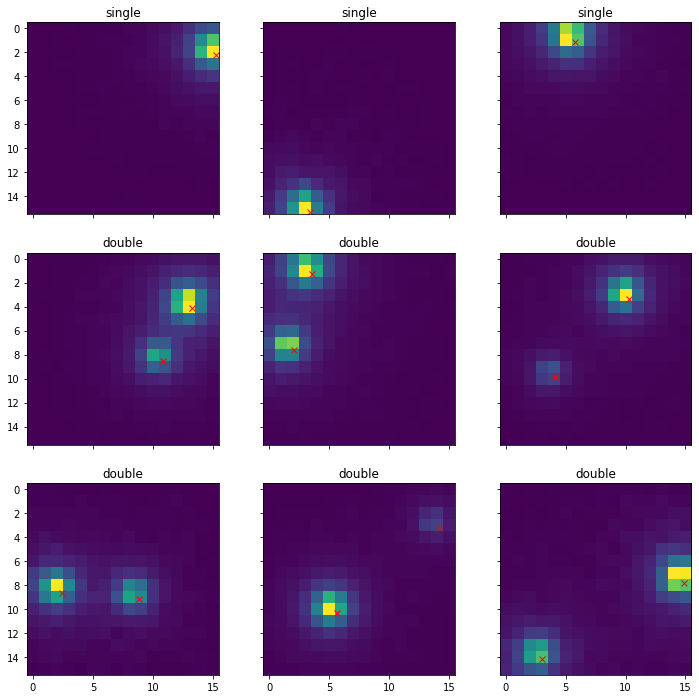

In [24]:
# Plot some images, with electron origin positions
%matplotlib inline

images = images.reshape(images.shape[0],16,16)
index = 99997
fig, ax = plt.subplots(3, 3, sharex='col', sharey='row', figsize=(12,12))
for i in range(3):
    for j in range(3):
        # plot image
        ax[i, j].imshow(images[index + i*3 + j])
        
        # plot origin of event
        x = positions[index + i*3 + j, 0]
        y = positions[index + i*3 + j, 1]
        ax[i, j].plot(x, y, 'rx')
        ax[i, j].set_title('single')
        if positions[index + i*3 + j, 3] != -100:
            x2 = positions[index + i*3 + j, 2]
            y2 = positions[index + i*3 + j, 3]
            ax[i, j].plot(x2, y2, 'rx')
            ax[i, j].set_title('double')
        
plt.show()

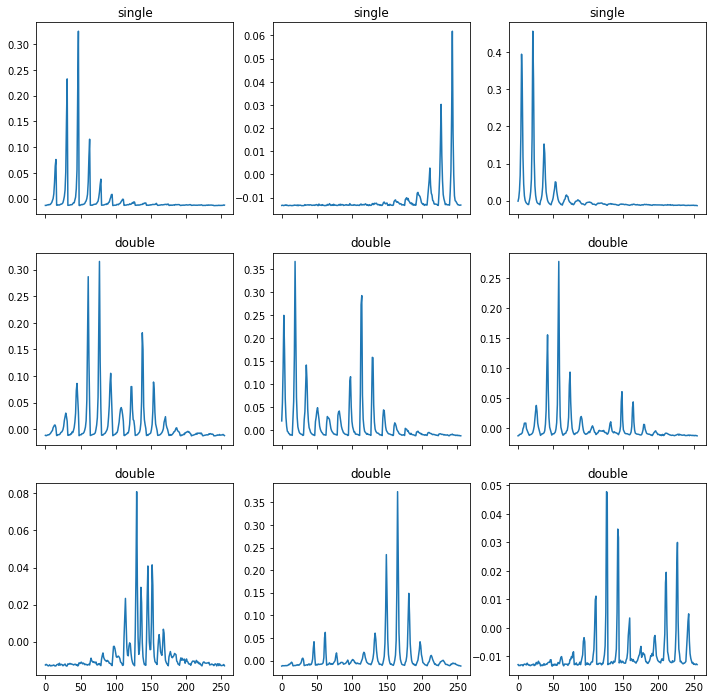

In [26]:
# Plot pixel by pixel intensity
fig, ax = plt.subplots(3, 3, sharex='col', figsize=(12,12))
for i in range(3):
    for j in range(3):
        # plot image
        ax[i, j].plot(range(256), images[index + i*3 + j].flatten())
        ax[i, j].set_title('single')
        if positions[index + i*3 + j, 3] != -100:
            ax[i, j].set_title('double')
plt.show()